<a href="https://colab.research.google.com/github/Shak97/Getting-and-Cleaning-Data-Course-Project/blob/master/final_unet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import os
import cv2
from keras.preprocessing.image import load_img
import numpy as np
import keras

Using TensorFlow backend.


In [0]:
from keras.models import *
from keras.layers import *
from keras.optimizers import *

In [0]:
train_dir = '/content/drive/My Drive/h_segmentation/train_image/images/'
mask_dir = '/content/drive/My Drive/h_segmentation/train_mask/labels/'

In [0]:
fil = os.listdir(train_dir)

In [0]:
fil.sort()
templist = []
sublist = []
m = 0
start = 0

for i in range(len(fil)):
    if fil[start][3:6] == fil[i][3:6]:
        templist.append(fil[i])
    else:
        sublist.append('')
        sublist[m] = templist.copy()
        m+=1
        templist.clear()
        templist.append(fil[i])
        start = i
sublist.append('')
sublist[m] = templist.copy()

######SORTING SECOND PART######
for eachlist in sublist:
    for i in range(len(eachlist)):
        eachlist[i] = eachlist[i].split('.')[0]

for ls in sublist:
    for i in range(len(ls)):
        min = int(ls[i][11:])
        minindex = i
        for j in range(i+1, len(ls)):
            if min > int(ls[j][11:]):
                min = int(ls[j][11:])
                minindex = j
        temp = ls[i]
        ls[i] = ls[minindex]
        ls[minindex] = temp

####ADDDING EXTENSION PNG
for x in sublist:
    for y in range(len(x)):
        x[y] = x[y] + '.png'

In [0]:
n = [] 
  
# function used for removing nested  
# lists in python.  
def reemovNestings(l): 
    for i in l: 
        if type(i) == list: 
            reemovNestings(i) 
        else: 
            n.append(i) 

In [0]:
reemovNestings(sublist)

In [9]:
print(n)

['la_003image1.png', 'la_003image2.png', 'la_003image3.png', 'la_003image4.png', 'la_003image5.png', 'la_003image6.png', 'la_003image7.png', 'la_003image8.png', 'la_003image9.png', 'la_003image10.png', 'la_003image11.png', 'la_003image12.png', 'la_003image13.png', 'la_003image14.png', 'la_003image15.png', 'la_003image16.png', 'la_003image17.png', 'la_003image18.png', 'la_003image19.png', 'la_003image20.png', 'la_003image21.png', 'la_003image22.png', 'la_003image23.png', 'la_003image24.png', 'la_003image25.png', 'la_003image26.png', 'la_003image27.png', 'la_003image28.png', 'la_003image29.png', 'la_003image30.png', 'la_003image31.png', 'la_003image32.png', 'la_003image33.png', 'la_003image34.png', 'la_003image35.png', 'la_003image36.png', 'la_003image37.png', 'la_003image38.png', 'la_003image39.png', 'la_003image40.png', 'la_003image41.png', 'la_003image42.png', 'la_003image43.png', 'la_003image44.png', 'la_003image45.png', 'la_003image46.png', 'la_003image47.png', 'la_003image48.png', 

In [0]:
X = []
M = []

for image in n:
  X.append(cv2.imread(train_dir+image, cv2.IMREAD_GRAYSCALE))

In [0]:
train_X = np.asarray(X)

In [0]:
train_X.shape

(2251, 320, 320, 1)

In [0]:
train_X = train_X.astype('float32')

In [0]:
train_X = train_X.reshape(2251,320,320,1)

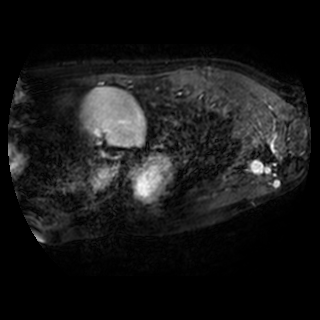

In [18]:
from google.colab.patches import cv2_imshow
cv2_imshow(train_X[11,:,:,:].reshape(320,320) * 255.0)

In [0]:
for i in range(2251):
  train_X[i,:,:] /= 255.0

In [19]:
print(np.max(train_X[121,:,:]))

1.0


In [0]:
train_X.shape

(2251, 320, 320, 1)

In [0]:
fil = os.listdir(mask_dir)

In [0]:
fil.sort()
templist = []
sublist = []
m = 0
start = 0

for i in range(len(fil)):
    if fil[start][3:6] == fil[i][3:6]:
        templist.append(fil[i])
    else:
        sublist.append('')
        sublist[m] = templist.copy()
        m+=1
        templist.clear()
        templist.append(fil[i])
        start = i
sublist.append('')
sublist[m] = templist.copy()

######SORTING SECOND PART######
for eachlist in sublist:
    for i in range(len(eachlist)):
        eachlist[i] = eachlist[i].split('.')[0]

for ls in sublist:
    for i in range(len(ls)):
        min = int(ls[i][11:])
        minindex = i
        for j in range(i+1, len(ls)):
            if min > int(ls[j][11:]):
                min = int(ls[j][11:])
                minindex = j
        temp = ls[i]
        ls[i] = ls[minindex]
        ls[minindex] = temp

####ADDDING EXTENSION PNG
for x in sublist:
    for y in range(len(x)):
        x[y] = x[y] + '.png'

In [0]:
N = [] 
  
# function used for removing nested  
# lists in python.  
def reemovNestings(l): 
    for i in l: 
        if type(i) == list: 
            reemovNestings(i) 
        else: 
            N.append(i) 

In [0]:
reemovNestings(sublist)

In [0]:
len(N)

2251

In [0]:
del M
del X

In [0]:
M = []

for image in N:
  M.append(cv2.imread(mask_dir+image, cv2.IMREAD_GRAYSCALE))

In [0]:
train_Y = np.asarray(M)

In [0]:
train_Y = train_Y.reshape(2251, 320, 320, 1)

In [0]:
train_Y = train_Y.astype('float32')

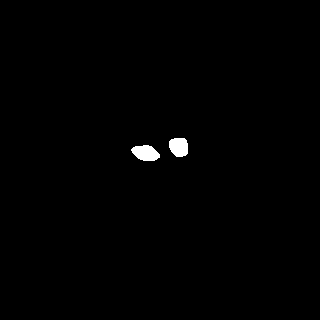

In [31]:
from google.colab.patches import cv2_imshow
cv2_imshow(train_Y[519,:,:,:].reshape(320,320))

In [0]:
for i in range(2251):
  train_Y[i,:,:] /= 255.0

In [33]:
print(np.max(train_Y[1223,:,:]))

1.0


In [0]:
cat_Y = keras.utils.np_utils.to_categorical(y=train_Y)

In [38]:
cat_Y.shape

(2251, 320, 320, 2)

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_X, cat_Y, test_size=0.2, random_state=1)

In [0]:
 X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [44]:
y_train.shape

(1440, 320, 320, 2)

In [0]:
  from keras import backend as k
  def iou_coef(y_true, y_pred, smooth = 1):
    y_true = k.flatten(y_true)
    y_pred = k.flatten(y_pred)
    intersection = k.sum(y_true * y_pred)
    return (2. * intersection + smooth) / (k.sum(y_true) + k.sum(y_pred) + smooth)

  
  def iou_coef_loss(y_true, y_pred):
    return 1-iou_coef(y_true, y_pred)

In [0]:
def unet(weights = None, input_size = (320,320,1)):
  
  inp = keras.engine.input_layer.Input(input_size)
  c1 = Conv2D(64, (3,3), activation='relu', padding='same')(inp)
  c1 = BatchNormalization()(c1)
  c1 = Conv2D(64, (3,3), activation = 'relu', padding = 'same')(c1)
  c1 = BatchNormalization()(c1)
  p1 = MaxPooling2D(pool_size=(2,2))(c1)
  #p1 = Dropout(0.1)(p1)
  
  c2 = Conv2D(128, (3,3), activation = 'relu', padding='same')(p1)
  c2 = BatchNormalization()(c2)
  c2 = Conv2D(128, (3,3), activation = 'relu', padding = 'same')(c2)
  c2 = BatchNormalization()(c2)
  p2 = MaxPooling2D(pool_size=(2,2))(c2)
  p2 = Dropout(0.3)(p2)
  
  c3 = Conv2D(256, (3,3), activation = 'relu', padding='same')(p2)
  c3 = BatchNormalization()(c3)
  c3 = Conv2D(256, (3,3), activation = 'relu', padding = 'same')(c3)
  c3 = BatchNormalization()(c3)
  p3 = MaxPooling2D(pool_size=(2,2))(c3)
  #p3 = Dropout(0.1)(p3)
  
  c4 = Conv2D(512, (3,3), activation = 'relu', padding='same')(p3)
  c4 = BatchNormalization()(c4)
  c4 = Conv2D(512, (3,3), activation = 'relu', padding = 'same')(c4)
  c4 = BatchNormalization()(c4)
  p4 = MaxPooling2D(pool_size=(2,2))(c4)
  #p4 = Dropout(0.1)(p4)
  
  c5 = Conv2D(1024, (3,3), activation = 'relu', padding='same')(p4)
  c5 = BatchNormalization()(c5)
  c5 = Conv2D(1024, (3,3), activation = 'relu', padding = 'same')(c5)
  c5 = BatchNormalization()(c5)
  #p5 = MaxPooling2D(pool_size=(2,2))(c5)
  
  u6 = Conv2DTranspose(512, (3,3), activation = 'relu', strides = (2,2), padding = 'same')(c5)
  concat6 = concatenate([u6,c4])
  c6 = Conv2D(512, (3,3), activation = 'relu', padding = 'same')(concat6)
  c6 = BatchNormalization()(c6)
  c6 = Conv2D(512, (3,3), activation = 'relu', padding = 'same')(c6)
  c6 = BatchNormalization()(c6)
  
  u7 = Conv2DTranspose(256, (3,3), activation = 'relu', strides = (2,2), padding = 'same')(c6)
  concat7 = concatenate([u7,c3])
  c7 = Conv2D(256, (3,3), activation = 'relu', padding = 'same')(concat7)
  c7 = BatchNormalization()(c7)
  c7 = Conv2D(256, (3,3), activation = 'relu', padding = 'same')(c7)
  c7 = BatchNormalization()(c7)
  
  u8 = Conv2DTranspose(128, (3,3), activation = 'relu', strides = (2,2), padding = 'same')(c7)
  concat8 = concatenate([u8,c2])
  c8 = Conv2D(128, (3,3), activation = 'relu', padding = 'same')(concat8)
  c8 = BatchNormalization()(c8)
  c8 = Conv2D(128, (3,3), activation = 'relu', padding = 'same')(c8)
  c8 = BatchNormalization()(c8)
  C8 = Dropout(0.3)(c8)
  
  u9 = Conv2DTranspose(64, (3,3), activation = 'relu', strides = (2,2), padding = 'same')(c8)
  concat9 = concatenate([u9,c1])
  c9 = Conv2D(64, (3,3), activation = 'relu', padding = 'same')(concat9)
  c9 = BatchNormalization()(c9)
  c9 = Conv2D(64, (3,3), activation = 'relu', padding = 'same')(c9)
  c9 = BatchNormalization()(c9)
  
  c10 = Conv2D(2, (1,1), activation = 'sigmoid')(c9)
  
  model = Model(input=inp, output=c10)   #input passed to this function must come from keras.layers.Input(a tensor), otherwise it will through error
  model.compile(optimizer = Adam(), loss = 'categorical_crossentropy', metrics = [iou_coef] )
  return model
  
  

In [58]:
model = unet()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:69: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`


In [59]:
fit_history = model.fit(x=X_train,y=y_train, validation_data=(X_val,y_val), batch_size = 1, epochs=10)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 1440 samples, validate on 360 samples
Epoch 1/10
1440/1440 [==============================] - 277s 193ms/step - loss: 0.0379 - iou_coef: 0.6914 - val_loss: 0.0098 - val_iou_coef: 0.7559
Epoch 2/10
1440/1440 [==============================] - 268s 186ms/step - loss: 0.0075 - iou_coef: 0.7735 - val_loss: 0.0070 - val_iou_coef: 0.8022
Epoch 3/10
1440/1440 [==============================] - 268s 186ms/step - loss: 0.0045 - iou_coef: 0.8242 - val_loss: 0.0058 - val_iou_coef: 0.8317
Epoch 4/10
1440/1440 [==============================] - 268s 186ms/step - loss: 0.0037 - iou_coef: 0.8536 - val_loss: 0.0086 - val_iou_coef: 0.8707
Epoch 5/10
1440/1440 [==============================] - 269s 187ms/step - loss: 0.0027 - iou_coef: 0.8782 - val_loss: 0.0055 - val_iou_coef: 0.8963
Epoch 6/10
1440/1440 [==============================] - 268s 186ms/step - loss: 0.0025 - iou_coef: 0.8933 - val_loss: 0

In [60]:
print(fit_history.history.keys())

dict_keys(['val_loss', 'val_iou_coef', 'loss', 'iou_coef'])


In [0]:
import matplotlib.pyplot as plt

%matplotlib inline

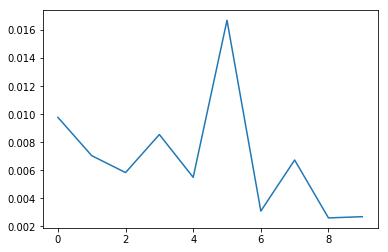

In [65]:
plt.plot(fit_history.history['val_loss'])

In [0]:
model.save_weights('unet-weights-updated.h5')

In [0]:
model.save('unet-model-initial-neg.h5')

In [67]:
pred = model.predict(X_test, batch_size=1, verbose=1)

451/451 [==============================] - 27s 60ms/step


In [77]:
pred_new.shape

(451, 320, 320)

In [0]:
#inverse of np_util.to_categorical
pred_new = np.argmax(pred, axis=3, out=None)

In [0]:
pred_new.reshape(451,320,320,1)

In [0]:
from google.colab.patches import cv2_imshow

In [92]:
from google.colab import files
files.download('unet-weights-updated.h5')

----------------------------------------
Exception happened during processing of request from ('::ffff:127.0.0.1', 42606, 0, 0)
Traceback (most recent call last):
  File "/usr/lib/python3.6/socketserver.py", line 320, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 351, in process_request
    self.finish_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 364, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/usr/lib/python3.6/socketserver.py", line 724, in __init__
    self.handle()
  File "/usr/lib/python3.6/http/server.py", line 418, in handle
    self.handle_one_request()
  File "/usr/lib/python3.6/http/server.py", line 406, in handle_one_request
    method()
  File "/usr/lib/python3.6/http/server.py", line 639, in do_GET
    self.copyfile(f, self.wfile)
  File "/usr/lib/python3.6/http/server.py", line 800, in copyfile
    shutil.copyfil

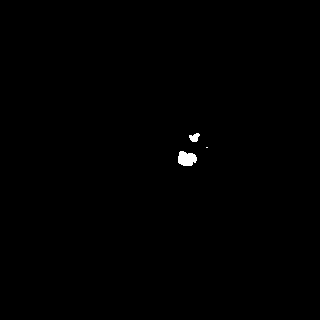

In [85]:
cv2_imshow((pred_new[13,:,:]*255).astype('uint8'))

In [0]:
for i in range(451):
  predicted_img[i,:,:] = (pred_new[i,:,:]*255).astype('uint8')

In [0]:
from keras import backend as kk

(320, 320)

In [148]:
for i in range(452):
  y_testn[i,:,:] = (y_testn[i,:,:]*255.0).astype('uint8')

IndexError: ignored

In [160]:
y_testn.shape

(451, 320, 320)

In [0]:
X_test = X_test.reshape(451,320,320)

In [0]:
for i in range(451):
  imageio.imwrite(str('test_x' + str(i) + '.png'), ((X_test[i,:,:]*255.0).astype('uint8')))

In [0]:
for i in range(334,451):
  files.download(str('test_x' + str(i) + '.png'))

In [0]:
y_testn = np.argmax(y_test, axis=3, out=None)

In [153]:
y_testn.shape

(451, 320, 320)

In [0]:
y_testn = y_testn.reshape(451,320,320)

In [0]:
for i in range(451):
  imageio.imwrite(str('test_y' + str(i) + '.png'), ((y_testn[i,:,:]*255.0).astype('uint8')))

In [0]:
for i in range(451):
  files.download(str('test_y' + str(i) + '.png'))

In [0]:
y_true = []

for i in range(451):
  y_true.append(cv2.imread(str('test_y' +str(i)+ '.png'), cv2.IMREAD_GRAYSCALE))

In [45]:
y_true = np.asarray(y_true)
y_true.shape

(451, 320, 320)

In [0]:
y_pred = []

for i in range(451):
  y_pred.append(cv2.imread(str('pred' +str(i)+ '.png'), cv2.IMREAD_GRAYSCALE))

In [47]:
y_pred = np.asarray(y_pred)
y_pred.shape



(451, 320, 320)

In [0]:
y_true = y_true.astype('float32')
y_pred = y_pred.astype('float32')

In [0]:
for i in range(451):
  y_true[i,:,:] /= 255.0
  y_pred[i,:,:] /= 255.0

In [0]:
temp = 0
for i in range(451):
  temp += iou_coef(((y_true[i,:,:])),(y_pred[i,:,:]))
a = kk.eval(temp)
#y = kk.eval(y)

In [67]:
a/451

0.7870172809338623

In [50]:
np.max(y_true[2,:,:])

1.0